In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime

df = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [18]:
#eliminamos columnas vacias
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

#eliminamos columna de status_id que no aporta nada
df.drop(['status_id'], axis=1, inplace=True)

#convertimos la columna status_type en numerica para poder escalarla: video=1, photo=2, link=3, status=4
df['status_type']=df['status_type'].replace({"video": 1, "photo": 2, 'link': 3, 'status': 4})

#convertimos la fecha de formato string a un objeto datetime para despues pasarlo a float
#string
df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')
#float
df['status_published'] = df['status_published'].apply(lambda x: x.timestamp())

In [19]:
#escalamos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [20]:
#iniciamos k-means
kmeans = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)

kmeans.fit(df)

KMeans(init='random', n_clusters=4, random_state=42)

In [21]:
# The lowest SSE value
kmeans.inertia_

8.225429180816983e+17

In [22]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 2.10171306e+00,  1.46228961e+09,  5.51905782e+02,
         8.54014989e+01,  7.60706638e+00,  5.46644540e+02,
         4.03533191e+00,  5.98501071e-01,  2.07708779e-01,
         3.95074946e-01,  2.46252677e-02],
       [ 1.71158744e+00,  1.51607573e+09,  1.64761036e+02,
         3.15862267e+02,  5.79862054e+01,  1.43250424e+02,
         1.82444822e+01,  1.81048387e+00,  1.00084890e+00,
         2.86290323e-01,  1.64473684e-01],
       [ 2.00462963e+00,  1.35239636e+09,  2.84965278e+01,
         6.39004630e+00,  3.12500000e-01,  2.84965278e+01,
         8.17124146e-14,  4.21884749e-15, -5.10702591e-15,
        -6.10622664e-16, -7.77156117e-16],
       [ 1.47962963e+00,  1.39502775e+09,  5.66427778e+02,
         1.49648148e+01,  2.87592593e+00,  5.66427778e+02,
         9.41469125e-14,  4.66293670e-15, -6.10622664e-15,
        -1.30451205e-15, -1.06858966e-15]])

In [23]:
# The number of iterations required to converge
kmeans.n_iter_

10

In [24]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:
kmeans.labels_[:5]

array([1, 1, 1, 1, 1])

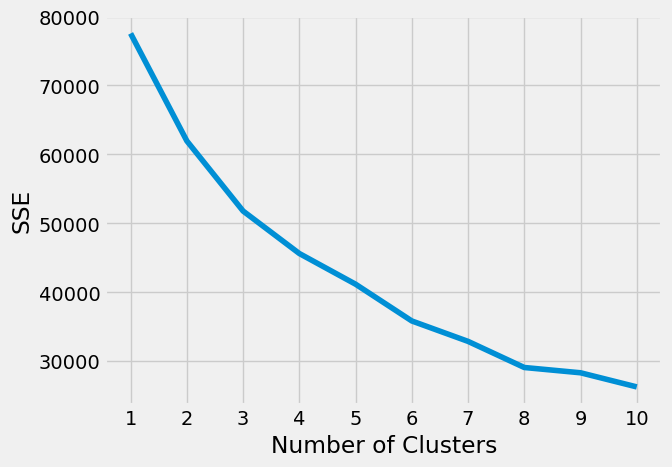

In [25]:
#Choosing the Appropriate Number of Clusters
# 1 The elbow method.     To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

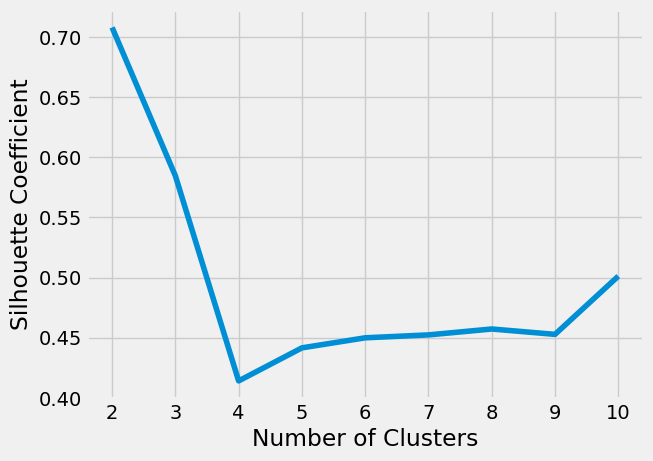

In [26]:
# 2 The silhouette coefficient
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Interpretando ambos métodos determino que el número óptimo de cluster es 3

In [27]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(df)
print (kmeans.inertia_)
print (kmeans.cluster_centers_)
print (kmeans.n_iter_)
print (kmeans.labels_[:5])

1.2693112681885102e+18
[[ 1.71353177e+00  1.51592780e+09  1.65177539e+02  3.14541060e+02
   5.77116318e+01  1.43705510e+02  1.82138484e+01  1.80430652e+00
   9.97888959e-01  2.86890437e-01  1.65083386e-01]
 [ 2.10589411e+00  1.45800706e+09  6.45526474e+02  8.07052947e+01
   7.53946054e+00  6.40972028e+02  3.45454545e+00  5.42457542e-01
   1.82817183e-01  3.58641359e-01  1.59840160e-02]
 [ 1.77896341e+00  1.36501350e+09  1.47643293e+02  8.34070122e+00
   9.39024390e-01  1.47643293e+02  4.97379915e-14  1.06581410e-14
  -6.77236045e-15 -1.74860126e-15 -1.80411242e-16]]
5
[0 0 0 0 0]


# EXERCICI 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

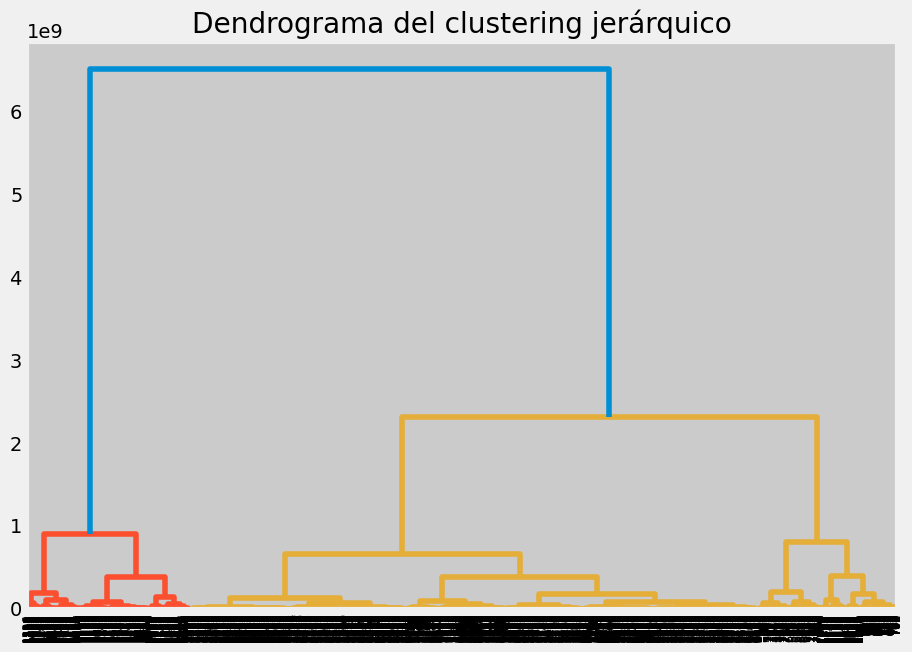

         status_type  status_published  num_reactions  num_comments  \
cluster                                                               
0           1.776097      1.365387e+09     150.940998      8.845688   
1           2.096774      1.462089e+09     600.081541     75.693548   
2           1.706635      1.516605e+09     163.289462    322.103643   

         num_shares   num_likes  num_loves  num_wows  num_hahas  num_sads  \
cluster                                                                     
0          1.107413  150.940998   0.000000  0.000000   0.000000  0.000000   
1          6.913082  594.625448   4.269713  0.620968   0.198029  0.338710   
2         59.189072  141.567216  18.424111  1.820685   1.016696  0.290546   

         num_angrys  
cluster              
0          0.000000  
1          0.026882  
2          0.166522  


In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Aplicamos el algoritmo de clustering jerárquico
Z = linkage(df, 'ward')
feature_names =  df.columns.tolist()

# Graficamos el dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma del clustering jerárquico")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# Aplicamos el algoritmo de clustering jerárquico con 3 clusters
k = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hierarchical_clustering.fit(df)

# Mostramos los resultados
fb_df = pd.DataFrame(df, columns=feature_names)
fb_df['cluster'] = hierarchical_clustering.labels_
print(fb_df.groupby('cluster').mean())